In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 16})

## Part 1: Read Stock Data for 20 companies

In [3]:
wd = "/Users/jerrychien/Desktop/OneDrive - University Of Houston/6350 - Statistical Learning and Data Mining/HW/HW 4/Python Version/Stock Data/"
comp = ["WMT", "AMZN", "AAPL", "CVS", "XOM", "UNH", "BRK-A", "MCK", "ABC", "GOOG","T", "CI", "F", "COST", "FDX", "CVX", "CAH", "MSFT", "JPM", "GM"]

In [4]:
for i in range(len(comp)):
    globals()["comp_" + str(i + 1)] = pd.read_csv(wd + comp[i] + ".csv")

## Part 2: Data Preprocessing

In [5]:
for i in range(len(comp)):
    temp = eval("comp_" + str(i + 1))["Close"].pct_change()
    globals()["comp_" + str(i + 1)] = temp[1:]

## Part 3: Create cases and features vectors

In [6]:
df = pd.DataFrame(columns = range(len(comp * 10)), index = range(len(temp)-11))
for i in range(len(comp)):
    temp = eval("comp_" + str(i + 1))
    for j in range(len(temp) - 10):
        df.iloc[j, i*10:i*10+10] = np.array(temp[j:j+10])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.00291036,0.00770573,0.0265323,0.0211061,-0.0123798,0.00749859,-0.00788713,-0.0302317,0.00889038,-0.006981,...,-0.0146383,0.015147,0.0284075,0.0100447,-0.0168509,0.00702445,-0.0164621,-0.0269504,-0.0253644,0.00747831
1,0.00770573,0.0265323,0.0211061,-0.0123798,0.00749859,-0.00788713,-0.0302317,0.00889038,-0.006981,-0.00092192,...,0.015147,0.0284075,0.0100447,-0.0168509,0.00702445,-0.0164621,-0.0269504,-0.0253644,0.00747831,0.0074228
2,0.0265323,0.0211061,-0.0123798,0.00749859,-0.00788713,-0.0302317,0.00889038,-0.006981,-0.00092192,-0.000576802,...,0.0284075,0.0100447,-0.0168509,0.00702445,-0.0164621,-0.0269504,-0.0253644,0.00747831,0.0074228,-0.00117893
3,0.0211061,-0.0123798,0.00749859,-0.00788713,-0.0302317,0.00889038,-0.006981,-0.00092192,-0.000576802,0.0191598,...,0.0100447,-0.0168509,0.00702445,-0.0164621,-0.0269504,-0.0253644,0.00747831,0.0074228,-0.00117893,-0.00206548
4,-0.0123798,0.00749859,-0.00788713,-0.0302317,0.00889038,-0.006981,-0.00092192,-0.000576802,0.0191598,0.00237824,...,-0.0168509,0.00702445,-0.0164621,-0.0269504,-0.0253644,0.00747831,0.0074228,-0.00117893,-0.00206548,-0.00206978


## Part 4: Create two disjoint class of cases

In [7]:
TRUC = comp_20[9:1004].reset_index(drop = True).map(lambda x: "HIGH" if x >= 0.006 else "LOW").astype(object)
TRUC.name = "TRUC"
TRUC

0      HIGH
1      HIGH
2       LOW
3       LOW
4       LOW
       ... 
990     LOW
991     LOW
992    HIGH
993    HIGH
994     LOW
Name: TRUC, Length: 995, dtype: object

In [8]:
class_size = pd.DataFrame(index = ["Number", "Percentage"], columns = ["LOW", "HIGH"])
for i in ["LOW", "HIGH"]:
    class_size.loc["Number", i] = TRUC.value_counts()[i]
    class_size.loc["Percentage", i] = np.round(TRUC.value_counts()[i] / len(TRUC)*100, 2)
    
class_size

,LOW,HIGH
Number,688,307
Percentage,69.15,30.85


## Part 5: PCA

### PCA by using built-in function

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
PCA_df = pd.DataFrame(pca.fit_transform(df))

#### PEV

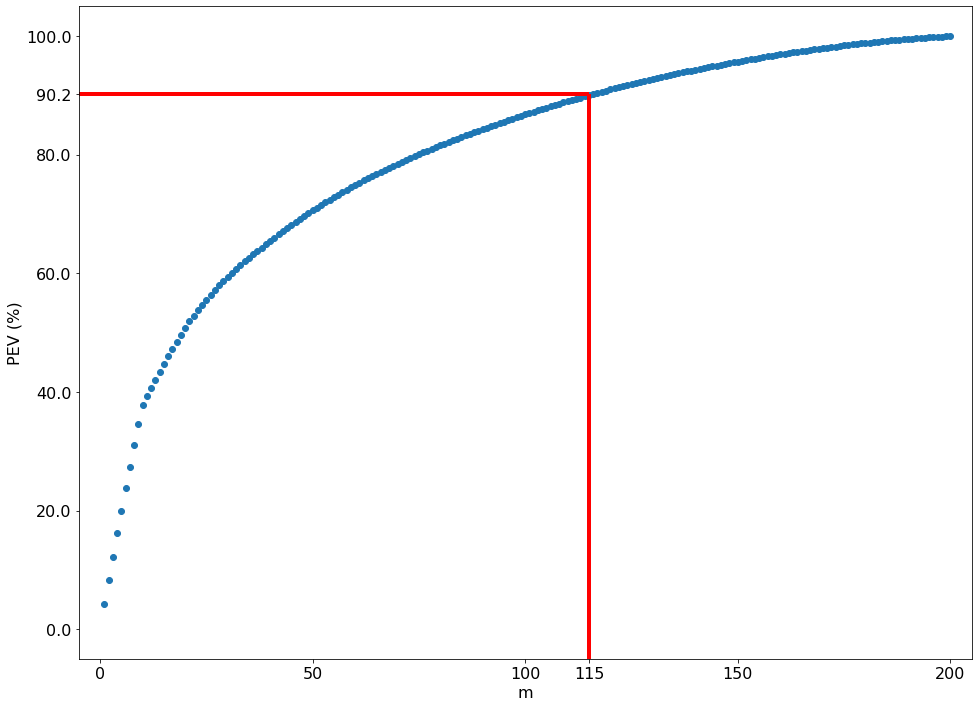

In [10]:
PEV = pca.explained_variance_ratio_.cumsum()*100
smallest_r = sum(PEV < 90) + 1

fig, ax = plt.subplots(1, 1)
ax.scatter(range(1,201), PEV)

ax.hlines(PEV[smallest_r], xmin = -5, xmax = smallest_r, color = "red", lw = 4)
ax.vlines(smallest_r, ymin = -5, ymax = PEV[smallest_r], color = "red", lw = 4)

ax.set_xlabel("m")
ax.set_ylabel("PEV (%)")
ax.set_xlim([-5, 205])
ax.set_ylim([-5, 105])
ax.set_xticks([0, 50, 100, smallest_r, 150, 200])
ax.set_yticks([0, 20, 40, 60, 80, PEV[smallest_r], 100])

plt.show()

In [11]:
PCA_df_truncated = pd.concat([TRUC, PCA_df.iloc[:, :smallest_r]], axis = 1)
PCA_df_truncated

,TRUC,0,1,2,3,4,5,6,7,8,...,105,106,107,108,109,110,111,112,113,114
0,HIGH,-0.015388,0.010218,0.034413,-0.064879,0.034753,0.058849,-0.085644,0.004664,0.076283,...,-0.011088,-0.005390,-0.008773,-0.002262,0.009269,-0.011650,-0.004465,0.016907,-0.009473,-0.009814
1,HIGH,0.034568,0.019025,0.043335,0.029335,-0.016037,0.085262,-0.038357,-0.081656,-0.042028,...,0.005964,-0.004060,-0.000471,0.012742,0.000233,-0.009675,0.005630,-0.002036,0.000170,-0.014077
2,LOW,-0.021137,-0.012954,0.019805,0.058770,-0.065403,-0.057890,-0.021074,0.002778,-0.097133,...,-0.008383,0.008546,-0.002781,-0.007732,0.015782,0.002399,0.000723,-0.012516,-0.010201,0.003068
3,LOW,-0.069622,0.042391,0.021197,-0.037369,0.035376,-0.105883,-0.027408,-0.021660,-0.044171,...,-0.006131,0.001365,-0.002996,0.005780,0.004437,0.008216,-0.008065,0.012678,-0.009526,0.003171
4,LOW,0.025701,0.077838,-0.029725,0.061631,0.052053,0.018997,0.038897,-0.018600,0.018138,...,0.001540,0.003950,-0.008658,0.014325,0.005298,-0.014960,0.011753,-0.003739,0.003706,-0.011036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,LOW,0.033293,-0.098375,0.133534,0.031300,-0.022621,0.009882,-0.011059,-0.056531,0.140084,...,0.006975,0.006836,-0.001455,0.006050,-0.016001,-0.008695,-0.010823,0.015982,-0.001553,0.002406
991,LOW,0.037063,-0.120973,0.148614,0.067465,-0.034967,0.011543,0.100105,-0.067620,0.045834,...,-0.024821,-0.011852,-0.000546,0.014681,0.003079,0.000510,0.003423,0.007234,-0.018661,0.003665
992,HIGH,-0.180537,0.015076,0.203439,-0.099046,-0.049760,-0.050171,0.086023,0.016703,-0.076111,...,-0.010881,-0.019147,-0.009908,-0.014334,-0.000531,0.003594,0.010417,-0.004181,-0.007454,-0.003936
993,HIGH,0.040930,0.208293,0.208427,0.022573,0.065352,-0.012077,0.031233,0.062746,-0.028437,...,0.015900,-0.014344,0.007117,0.004824,-0.001258,0.009350,0.014249,-0.004729,-0.003139,-0.002101


## Part 6: Training and Test Sets

In [12]:
size_test_training = pd.DataFrame(index = ["Total"], columns = ["Test", "Training"])

from sklearn.model_selection import train_test_split
s_training, s_test = train_test_split(PCA_df_truncated, train_size = 0.85, random_state = 20211125)

size_test_training.loc["Total", "Test"] = len(s_test)
size_test_training.loc["Total", "Training"] = len(s_training)

size_test_training

,Test,Training
Total,150,845


## Part 7: Linear SVM

In [13]:
cost_list_linear = [0.01, 0.25, 0.5, 0.75, 1, 2, 2.5, 5, 7.5, 10]
result_linear = pd.DataFrame({"Cost": cost_list_linear, "Training Accuracy": np.nan, "Test Accuracy": np.nan, 
                              "Accuracy Ratio": np.nan, "% Support Vector": np.nan, "Computing Time(s)": np.nan})

from sklearn.svm import SVC
for i in range(len(cost_list_linear)):
    ls = SVC(kernel = "linear", C = cost_list_linear[i], random_state = 20211125)
    start = time.time()
    ls.fit(s_training.iloc[:, 1:], s_training.iloc[:, 0])
    end = time.time()
    pred_training = ls.predict(s_training.iloc[:, 1:])
    pred_test = ls.predict(s_test.iloc[:, 1:])
    
    result_linear.iloc[i, 1] = round(np.mean(pred_training == s_training.iloc[:, 0])*100, 2)
    result_linear.iloc[i, 2] = round(np.mean(pred_test == s_test.iloc[:, 0])*100, 2)
    result_linear.iloc[i, 3] = round(result_linear.iloc[i, 2]/result_linear.iloc[i, 1]*100, 2)
    result_linear.iloc[i, 4] = round(len(ls.support_vectors_) / len(s_training)*100, 2)
    result_linear.iloc[i, 5] = round(end - start, 2)
    
result_linear

,Cost,Training Accuracy,Test Accuracy,Accuracy Ratio,% Support Vector,Computing Time(s)
0,0.01,69.23,68.67,99.19,61.89,0.08
1,0.25,69.23,68.67,99.19,63.91,0.08
2,0.50,69.23,68.67,99.19,63.79,0.07
3,0.75,69.23,68.67,99.19,63.91,0.08
4,1.00,69.35,68.67,99.02,63.91,0.06
5,2.00,70.41,70.67,100.37,64.26,0.06
6,2.50,72.31,71.33,98.64,64.02,0.05
7,5.00,80.59,76.67,95.14,61.54,0.06
8,7.50,83.91,79.33,94.54,59.17,0.05
9,10.00,85.33,81.33,95.31,56.69,0.05


## Part 8

### 8.1 Linear SVM result plot

<ipython-input-14-6e83532ac6b4>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cost_list_linear, rotation = 45)


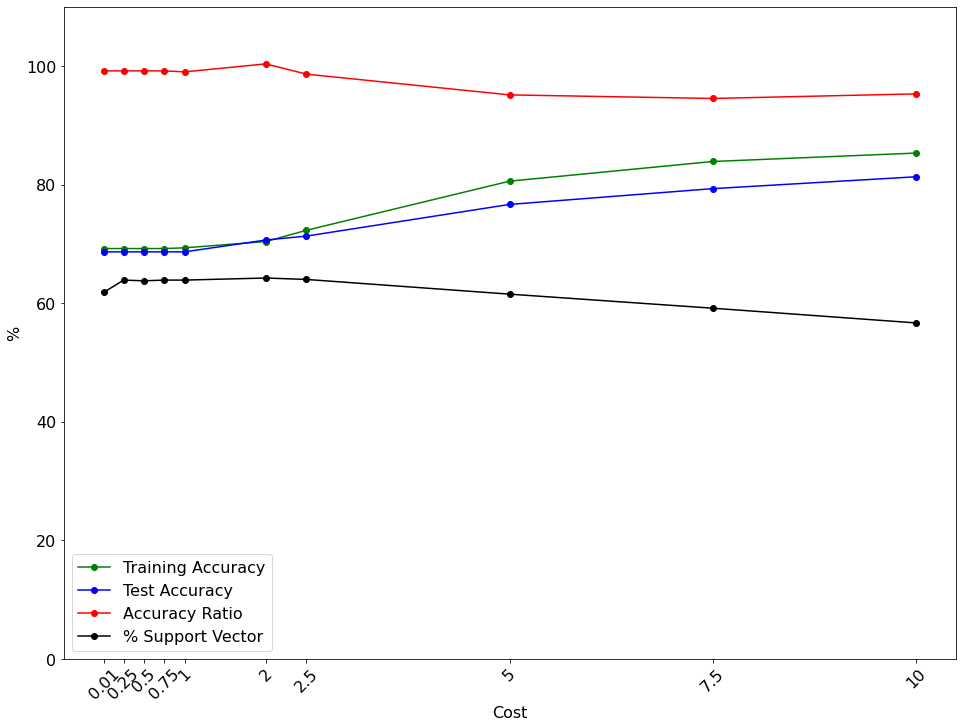

In [14]:
fig, ax = plt.subplots(1, 1)

ax.plot(result_linear["Cost"], result_linear["Training Accuracy"], marker = "o", label = "Training Accuracy", color = "green")
ax.plot(result_linear["Cost"], result_linear["Test Accuracy"], marker = "o", label = "Test Accuracy", color = "blue")
ax.plot(result_linear["Cost"], result_linear["Accuracy Ratio"], marker = "o", label = "Accuracy Ratio", color = "red")
ax.plot(result_linear["Cost"], result_linear["% Support Vector"], marker = "o", label = "% Support Vector", color = "black")

ax.set_ylim([0, 110])
ax.set_xlabel("Cost")
ax.set_ylabel("%")
ax.set_xticklabels(cost_list_linear, rotation = 45)
ax.set_xticks(cost_list_linear)
ax.legend()
plt.show()

### 8.2 Secondary Linear SVM

In [15]:
cost_list_linear_new = [10, 20, 30, 40, 50, 75, 100, 200, 250, 300, 400, 500]
result_linear_new = pd.DataFrame({"Cost": cost_list_linear_new, "Training Accuracy": np.nan, "Test Accuracy": np.nan, 
                                  "Accuracy Ratio": np.nan, "% Support Vector": np.nan, "Computing Time(s)": np.nan})

from sklearn.svm import SVC
for i in range(len(cost_list_linear_new)):
    ls = SVC(kernel = "linear", C = cost_list_linear_new[i], random_state = 20211125)
    start = time.time()
    ls.fit(s_training.iloc[:, 1:], s_training.iloc[:, 0])
    end = time.time()
    pred_training = ls.predict(s_training.iloc[:, 1:])
    pred_test = ls.predict(s_test.iloc[:, 1:])
    
    result_linear_new.iloc[i, 1] = round(np.mean(pred_training == s_training.iloc[:, 0])*100, 2)
    result_linear_new.iloc[i, 2] = round(np.mean(pred_test == s_test.iloc[:, 0])*100, 2)
    result_linear_new.iloc[i, 3] = round(result_linear_new.iloc[i, 2]/result_linear_new.iloc[i, 1]*100, 2)
    result_linear_new.iloc[i, 4] = round(len(ls.support_vectors_) / len(s_training)*100, 2)
    result_linear_new.iloc[i, 5] = round(end - start, 2)
    
result_linear_new

,Cost,Training Accuracy,Test Accuracy,Accuracy Ratio,% Support Vector,Computing Time(s)
0,10,85.33,81.33,95.31,56.69,0.06
1,20,89.35,84.67,94.76,50.18,0.04
2,30,90.53,83.33,92.05,46.75,0.04
3,40,91.12,83.33,91.45,44.62,0.04
4,50,91.95,83.33,90.63,42.72,0.04
5,75,93.02,84.67,91.02,39.41,0.05
6,100,93.61,86.00,91.87,36.92,0.05
7,200,94.32,86.67,91.89,31.83,0.06
8,250,94.91,87.33,92.01,30.53,0.05
9,300,94.91,88.00,92.72,29.35,0.05


<ipython-input-16-79e36e6a32f3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cost_list_linear_new, rotation = 45)


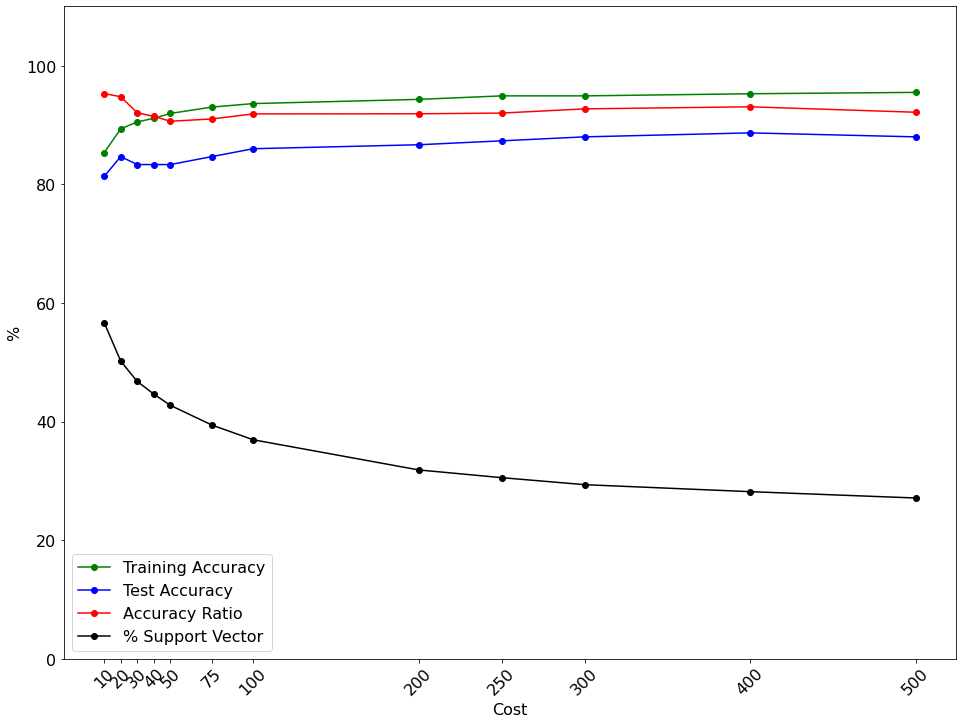

In [16]:
fig, ax = plt.subplots(1, 1)

ax.plot(result_linear_new["Cost"], result_linear_new["Training Accuracy"], marker = "o", label = "Training Accuracy", color = "green")
ax.plot(result_linear_new["Cost"], result_linear_new["Test Accuracy"], marker = "o", label = "Test Accuracy", color = "blue")
ax.plot(result_linear_new["Cost"], result_linear_new["Accuracy Ratio"], marker = "o", label = "Accuracy Ratio", color = "red")
ax.plot(result_linear_new["Cost"], result_linear_new["% Support Vector"], marker = "o", label = "% Support Vector", color = "black")

ax.set_ylim([0, 110])
ax.set_xlabel("Cost")
ax.set_ylabel("%")
ax.set_xticklabels(cost_list_linear_new, rotation = 45)
ax.set_xticks(cost_list_linear_new)
ax.legend()
plt.show()

## Part 9

### 9.1 Hilbert Distance

In [17]:
s_training_high = s_training[s_training["TRUC"] == "HIGH"].iloc[:, 1:]
s_training_low = s_training[s_training["TRUC"] == "LOW"].iloc[:, 1:]
from scipy.spatial.distance import cdist
distance = pd.DataFrame(cdist(s_training_high, s_training_low))
distance

,0,1,2,3,4,5,6,7,8,9,...,575,576,577,578,579,580,581,582,583,584
0,0.339555,0.331077,0.219559,0.355989,0.148514,0.167223,0.152216,0.175514,0.175984,0.216627,...,0.199658,0.177973,0.324129,0.239458,0.220777,0.165721,0.165837,0.232577,0.197072,0.232683
1,0.366480,0.346766,0.238209,0.388026,0.172542,0.209992,0.186772,0.212930,0.179157,0.231245,...,0.237461,0.219890,0.357672,0.267305,0.255586,0.215689,0.202367,0.249313,0.228549,0.282771
2,0.303837,0.317396,0.199547,0.354191,0.142725,0.173771,0.155574,0.150940,0.164530,0.192324,...,0.200646,0.160555,0.323688,0.218090,0.225872,0.156870,0.150947,0.217247,0.189506,0.210700
3,0.312334,0.337249,0.210449,0.377335,0.171218,0.210444,0.188603,0.173715,0.181733,0.224492,...,0.236868,0.175705,0.357609,0.260117,0.233692,0.188659,0.179463,0.258725,0.187661,0.235295
4,0.420706,0.418139,0.326167,0.376646,0.293883,0.307702,0.328058,0.315513,0.308232,0.328416,...,0.324406,0.336691,0.433731,0.342014,0.329633,0.314684,0.292046,0.335383,0.350423,0.312820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.364141,0.374893,0.229732,0.364595,0.240995,0.268239,0.296492,0.248656,0.263162,0.331168,...,0.282104,0.288010,0.396838,0.329896,0.283871,0.260726,0.253626,0.310948,0.300243,0.259697
256,0.382975,0.354769,0.235274,0.367333,0.217945,0.235508,0.239684,0.204999,0.215473,0.262503,...,0.236564,0.231032,0.364426,0.304287,0.242260,0.215075,0.228446,0.269944,0.230799,0.251602
257,0.332993,0.357692,0.219639,0.388174,0.176882,0.205118,0.197824,0.200186,0.201827,0.226859,...,0.220816,0.210556,0.337219,0.264452,0.234341,0.202088,0.188511,0.260283,0.238591,0.222358
258,0.317230,0.346581,0.180914,0.359753,0.169022,0.174632,0.194712,0.180595,0.174809,0.228473,...,0.217928,0.171495,0.352171,0.260730,0.216574,0.172904,0.180508,0.235365,0.219817,0.212351


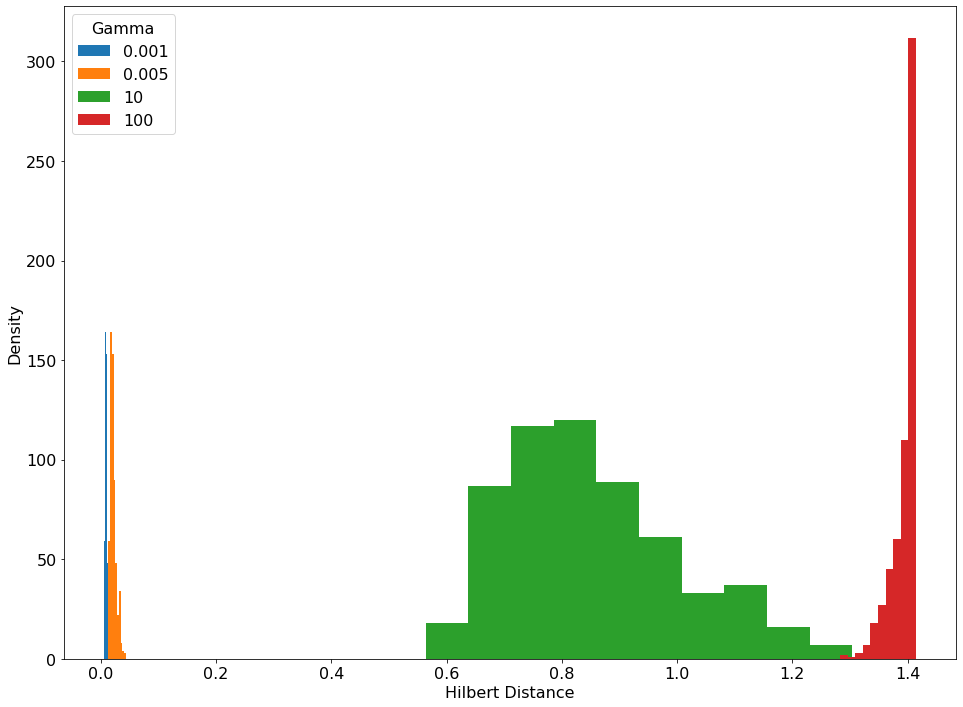

In [18]:
fig, ax = plt.subplots(1, 1)
gamma_list = [0.001, 0.005, 10, 100]
for i in range(len(gamma_list)):
    SIM = np.exp(-gamma_list[i]*distance**2)
    h_distance = np.sqrt(2 - 2*SIM)
    ax.hist(h_distance.values.tolist()[0], bins = 10, label = gamma_list[i])

ax.set_xlabel("Hilbert Distance")
ax.set_ylabel("Density")
ax.legend(title = "Gamma")
plt.show()

### 9.2 Error Weight Coefficient

In [19]:
cost_list_radial = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

### 9.3 Radial Kernel SVM

In [20]:
gamma_list_radial = [0.01, 0.1, 1, 10]
for i in range(len(gamma_list_radial)):
    temp = pd.DataFrame({"Cost": cost_list_radial, "Training Accuracy": np.nan, "Test Accuracy": np.nan, 
                         "Accuracy Ratio": np.nan, "% Support Vector": np.nan, "Computing Time(s)": np.nan})
    for j in range(len(cost_list_radial)):
        rs = SVC(C = cost_list_radial[j], kernel = "rbf", random_state = 20211125, gamma = gamma_list_radial[i])
        start = time.time()
        rs.fit(s_training.iloc[:, 1:], s_training.iloc[:, 0])
        end = time.time()
        pred_training = rs.predict(s_training.iloc[:, 1:])
        pred_test = rs.predict(s_test.iloc[:, 1:])
        
        temp.iloc[j, 1] = round(np.mean(pred_training == s_training.iloc[:, 0])*100, 2)
        temp.iloc[j, 2] = round(np.mean(pred_test == s_test.iloc[:, 0])*100, 2)
        temp.iloc[j, 3] = round(temp.iloc[j, 2]/temp.iloc[j, 1]*100, 2)
        temp.iloc[j, 4] = round(len(ls.support_vectors_) / len(s_training)*100, 2)
        temp.iloc[j, 5] = round(end - start, 2)
    
    globals()["result_radial_" + str(i+1)] = temp

In [21]:
print("Gamma =" , gamma_list_radial[0])
result_radial_1

Gamma = 0.01


,Cost,Training Accuracy,Test Accuracy,Accuracy Ratio,% Support Vector,Computing Time(s)
0,100,70.41,70.67,100.37,27.1,0.09
1,200,77.28,74.00,95.76,27.1,0.07
2,300,81.54,79.33,97.29,27.1,0.07
3,400,84.26,80.00,94.94,27.1,0.05
4,500,85.33,81.33,95.31,27.1,0.05
5,600,87.22,83.33,95.54,27.1,0.06
6,700,88.17,83.33,94.51,27.1,0.07
7,800,88.64,84.00,94.77,27.1,0.07
8,900,89.23,84.67,94.89,27.1,0.05
9,1000,89.47,84.67,94.64,27.1,0.07


In [22]:
print("Gamma =" , gamma_list_radial[1])
result_radial_2

Gamma = 0.1


,Cost,Training Accuracy,Test Accuracy,Accuracy Ratio,% Support Vector,Computing Time(s)
0,100,89.35,84.67,94.76,27.1,0.06
1,200,91.12,83.33,91.45,27.1,0.07
2,300,92.43,84.00,90.88,27.1,0.06
3,400,93.25,86.00,92.23,27.1,0.06
4,500,93.73,86.67,92.47,27.1,0.06
5,600,94.32,86.67,91.89,27.1,0.07
6,700,94.56,87.33,92.35,27.1,0.07
7,800,94.56,87.33,92.35,27.1,0.07
8,900,94.44,86.00,91.06,27.1,0.05
9,1000,94.56,87.33,92.35,27.1,0.04


In [23]:
print("Gamma =" , gamma_list_radial[2])
result_radial_3

Gamma = 1


,Cost,Training Accuracy,Test Accuracy,Accuracy Ratio,% Support Vector,Computing Time(s)
0,100,96.09,88.67,92.28,27.1,0.04
1,200,97.40,90.00,92.40,27.1,0.05
2,300,97.75,90.67,92.76,27.1,0.04
3,400,98.22,90.67,92.31,27.1,0.05
4,500,98.93,91.33,92.32,27.1,0.06
5,600,99.05,91.33,92.21,27.1,0.07
6,700,99.29,90.00,90.64,27.1,0.08
7,800,99.41,88.67,89.20,27.1,0.08
8,900,99.53,88.67,89.09,27.1,0.06
9,1000,99.53,89.33,89.75,27.1,0.07


In [24]:
print("Gamma =" , gamma_list_radial[3])
result_radial_4

Gamma = 10


,Cost,Training Accuracy,Test Accuracy,Accuracy Ratio,% Support Vector,Computing Time(s)
0,100,100.0,90.0,90.0,27.1,0.07
1,200,100.0,90.0,90.0,27.1,0.05
2,300,100.0,90.0,90.0,27.1,0.06
3,400,100.0,90.0,90.0,27.1,0.06
4,500,100.0,90.0,90.0,27.1,0.07
5,600,100.0,90.0,90.0,27.1,0.07
6,700,100.0,90.0,90.0,27.1,0.05
7,800,100.0,90.0,90.0,27.1,0.06
8,900,100.0,90.0,90.0,27.1,0.06
9,1000,100.0,90.0,90.0,27.1,0.07


## Part 10: SVM Comparison

Since the best performance Radial Kernel doesn't give a much better accuracy or lower % of Support Vector, it is easier to use linear Kernel in term of computation time and parameter tuning.

In [25]:
cost_list_linear_best = [500]
result_best = pd.DataFrame({"Cost": cost_list_linear_best, "Training Accuracy": np.nan, "Test Accuracy": np.nan, 
                            "Accuracy Ratio": np.nan, "% Support Vector": np.nan, "Computing Time(s)": np.nan})

from sklearn.svm import SVC
ls_best = SVC(kernel = "linear", C = cost_list_linear_best[0], random_state = 20211125)
start = time.time()
ls_best.fit(s_training.iloc[:, 1:], s_training.iloc[:, 0])
end = time.time()
pred_training = ls_best.predict(s_training.iloc[:, 1:])
pred_test = ls_best.predict(s_test.iloc[:, 1:])
    
result_best.iloc[0, 1] = round(np.mean(pred_training == s_training.iloc[:, 0])*100, 2)
result_best.iloc[0, 2] = round(np.mean(pred_test == s_test.iloc[:, 0])*100, 2)
result_best.iloc[0, 3] = round(result_best.iloc[0, 2]/result_best.iloc[0, 1]*100, 2)
result_best.iloc[0, 4] = round(len(ls.support_vectors_) / len(s_training)*100, 2)
result_best.iloc[0, 5] = round(end - start, 2)
    
result_best

,Cost,Training Accuracy,Test Accuracy,Accuracy Ratio,% Support Vector,Computing Time(s)
0,500,95.5,88.0,92.15,27.1,0.08


In [26]:
from sklearn.metrics import confusion_matrix
conf_matrix_training = pd.DataFrame(np.round(confusion_matrix(s_training.iloc[:, 0], pred_training, normalize = "true",
                                                              labels = ["HIGH", "LOW"])*100, 2), 
                                    index = ["HIGH", "LOW"], columns = ["HIGH", "LOW"])
conf_matrix_training.index.name = "True"
conf_matrix_training.columns.name = "Predicted"
conf_matrix_training

Predicted,HIGH,LOW
True,,
HIGH,91.54,8.46
LOW,2.74,97.26


In [27]:
conf_matrix_test = pd.DataFrame(np.round(confusion_matrix(s_test.iloc[:, 0], pred_test, normalize = "true",
                                                          labels = ["HIGH", "LOW"])*100, 2), 
                                index = ["HIGH", "LOW"], columns = ["HIGH", "LOW"])
conf_matrix_test.index.name = "True"
conf_matrix_test.columns.name = "Predicted"
conf_matrix_test

Predicted,HIGH,LOW
True,,
HIGH,78.72,21.28
LOW,7.77,92.23


In [28]:
support_vector = pd.DataFrame(index = ["HIGH", "LOW"], columns = ["% Support Vector"])
support_vector.loc["HIGH"] = np.round(ls_best.n_support_[0] / len(s_training)*100, 2)
support_vector.loc["LOW"] = np.round(ls_best.n_support_[1] / len(s_training)*100, 2)
support_vector

,% Support Vector
HIGH,13.02
LOW,14.08


## Part 11: Graph

In [29]:
target_comp = pd.read_csv(wd + comp[19] + ".csv")

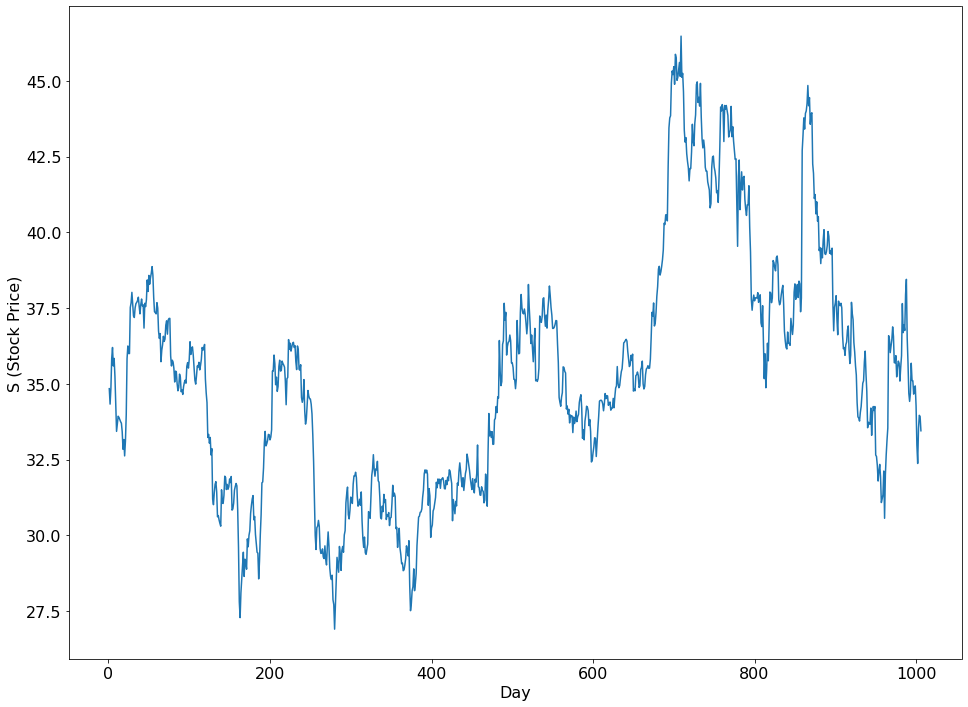

In [30]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(1, len(target_comp) + 1), target_comp["Close"])
ax.set_ylabel("S (Stock Price)")
ax.set_xlabel("Day")
plt.show()

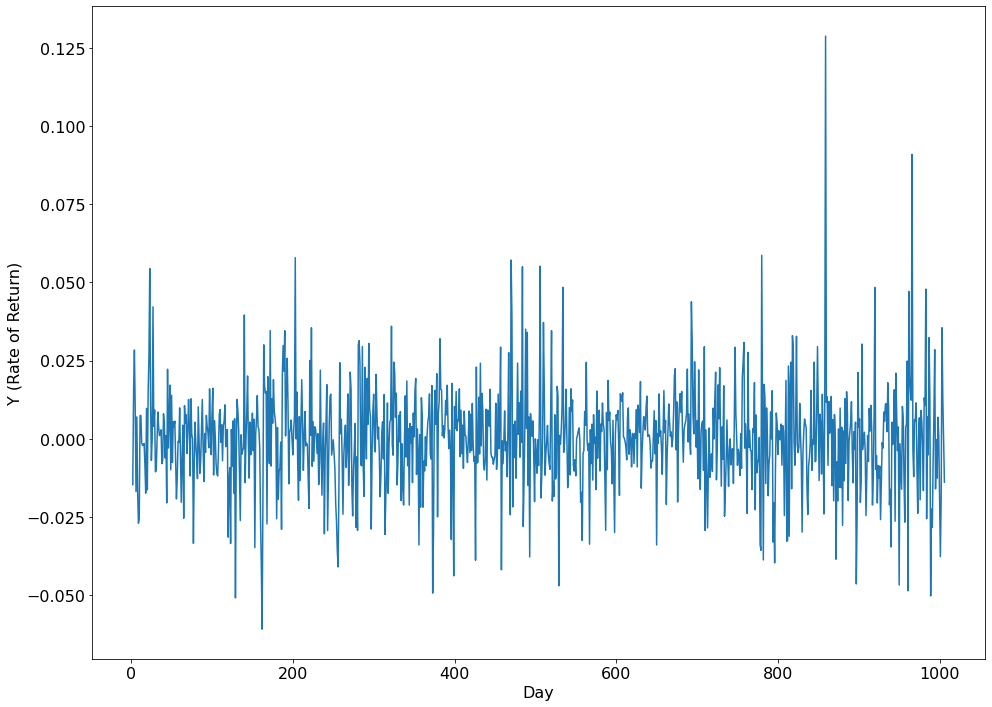

In [31]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(2, len(target_comp) + 1), comp_20)
ax.set_ylabel("Y (Rate of Return)")
ax.set_xlabel("Day")
plt.show()

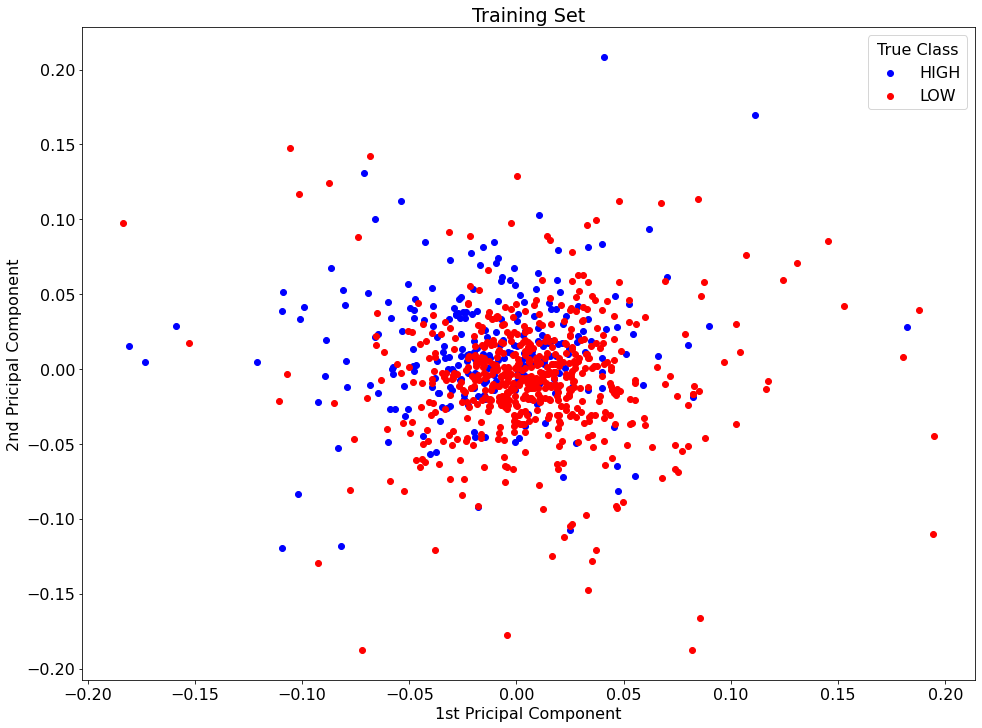

In [32]:
fig, ax = plt.subplots(1, 1)

ax.scatter(s_training_high.iloc[:, 0], s_training_high.iloc[:, 1], color = "blue", label = "HIGH")
ax.scatter(s_training_low.iloc[:, 0], s_training_low.iloc[:, 1], color = "red", label = "LOW")

ax.set_ylabel("2nd Pricipal Component")
ax.set_xlabel("1st Pricipal Component")
ax.set_title("Training Set")
ax.legend(title = "True Class")
plt.show()

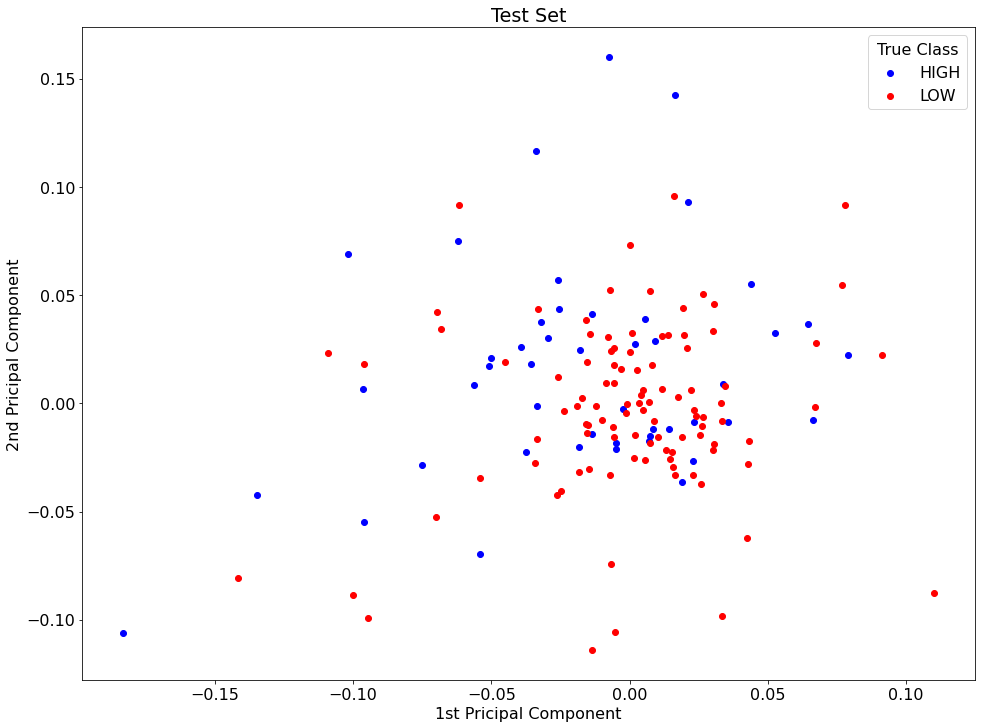

In [33]:
fig, ax = plt.subplots(1, 1)

ax.scatter(s_test[s_test["TRUC"] == "HIGH"].iloc[:, 1], s_test[s_test["TRUC"] == "HIGH"].iloc[:, 2], color = "blue", label = "HIGH")
ax.scatter(s_test[s_test["TRUC"] == "LOW"].iloc[:, 1], s_test[s_test["TRUC"] == "LOW"].iloc[:, 2], color = "red", label = "LOW")

ax.set_ylabel("2nd Pricipal Component")
ax.set_xlabel("1st Pricipal Component")
ax.set_title("Test Set")
ax.legend(title = "True Class")
plt.show()

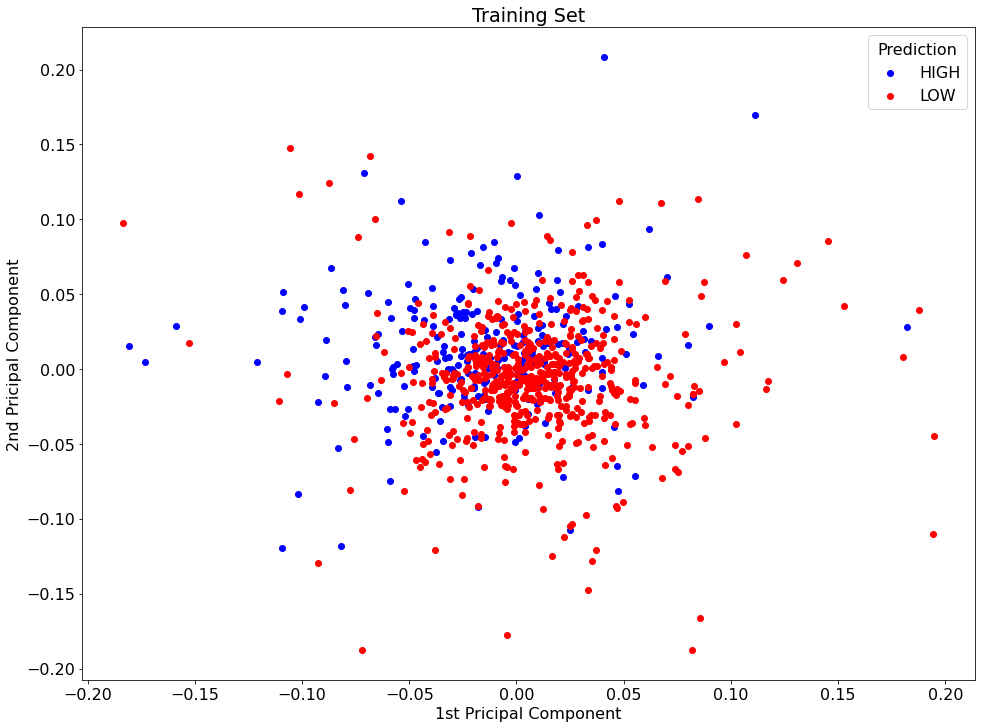

In [34]:
fig, ax = plt.subplots(1, 1)

ax.scatter(s_training[pred_training == "HIGH"].iloc[:, 1], s_training[pred_training == "HIGH"].iloc[:, 2], color = "blue", label = "HIGH")
ax.scatter(s_training[pred_training == "LOW"].iloc[:, 1], s_training[pred_training == "LOW"].iloc[:, 2], color = "red", label = "LOW")

ax.set_ylabel("2nd Pricipal Component")
ax.set_xlabel("1st Pricipal Component")
ax.set_title("Training Set")
ax.legend(title = "Prediction")
plt.show()

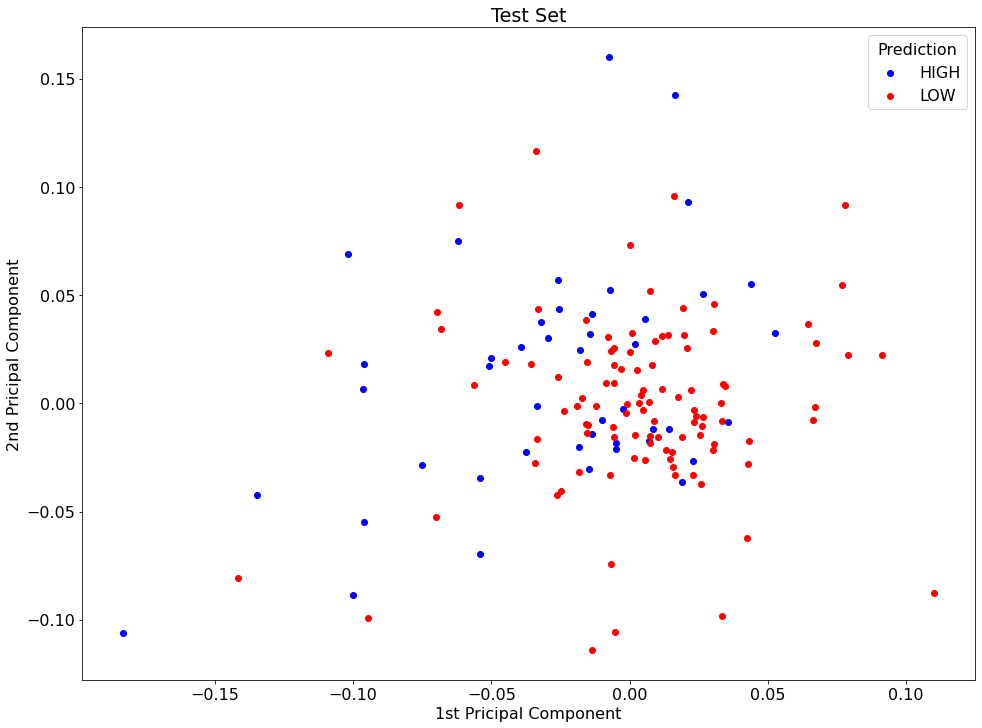

In [35]:
fig, ax = plt.subplots(1, 1)

ax.scatter(s_test[pred_test == "HIGH"].iloc[:, 1], s_test[pred_test == "HIGH"].iloc[:, 2], color = "blue", label = "HIGH")
ax.scatter(s_test[pred_test == "LOW"].iloc[:, 1], s_test[pred_test == "LOW"].iloc[:, 2], color = "red", label = "LOW")

ax.set_ylabel("2nd Pricipal Component")
ax.set_xlabel("1st Pricipal Component")
ax.set_title("Test Set")
ax.legend(title = "Prediction")
plt.show()